# Data Visualization using Python
### Muluken Muche
This data visualization use several python libraries to showcase available plots and charts to visualize NCSES data. The libraries include  seaborn, matplotlib, bokeh, plotly, ggplot, altair, and geoplotlib as necessary. The purpose is to create a template of figures so that we could use for similar data. Python codes are adopted from several freely available websites. This plots and cahrts use two tables downloaded from https://ncses.nsf.gov/pubs/nsf19301/data.

## 1) Doctorate recipients, by broad field of study and sex: Selected years, 1987–2017
 

In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import hide_code
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

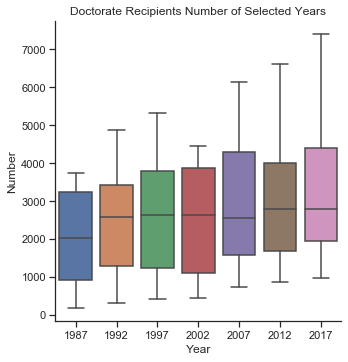

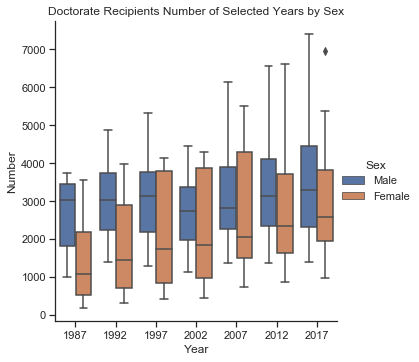

In [8]:
dFF = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab014_Edited.xlsx')
sns.catplot(x="Year", y="Number", kind="box",
            data=dFF).set(title="Doctorate Recipients Number of Selected Years");

sns.catplot(x="Year", y="Number", hue="Sex", kind="box",
            data=dFF).set(title="Doctorate Recipients Number of Selected Years by Sex");


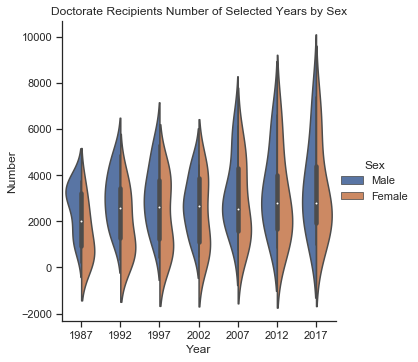

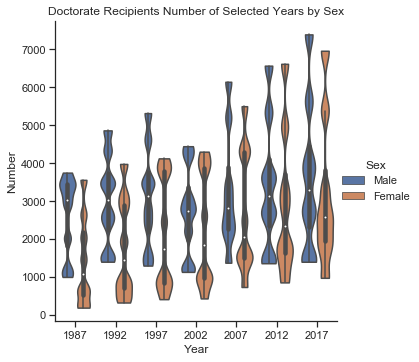

In [10]:
sns.catplot(x="Year", y="Number", hue="Sex",
            kind="violin", split=True,
            data=dFF).set(title="Doctorate Recipients Number of Selected Years by Sex");
sns.catplot(x="Year", y="Number", hue="Sex",
            kind="violin", bw=.15, cut=0,
            data=dFF).set(title="Doctorate Recipients Number of Selected Years by Sex");

C:\Users\Muluken\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


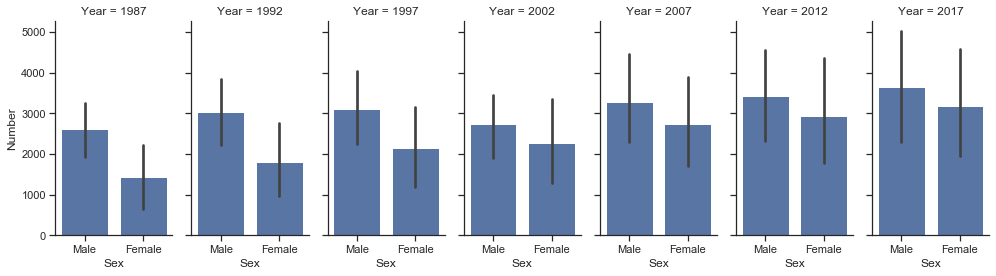

In [27]:
g = sns.FacetGrid(dFF, col="Year", hue_order="Sex",  height=4, aspect=0.5)
g.map(sns.barplot, "Sex", "Number");

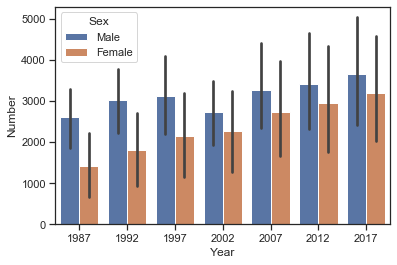

In [13]:
ax = sns.barplot(x="Year", y="Number", hue="Sex", data=dFF);

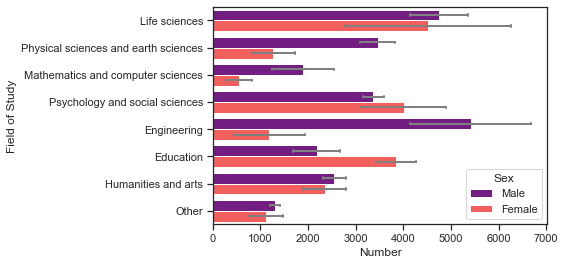

In [14]:
# create plot
chart = sns.barplot(x = 'Number', y = 'Field of Study', hue = 'Sex', data = dFF,
            palette =  'magma',
           # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

dFF.groupby(['Sex', 'Field of Study']).mean()['Number']
dFF.groupby(['Sex', 'Field of Study']).std()['Number']

plt.show()

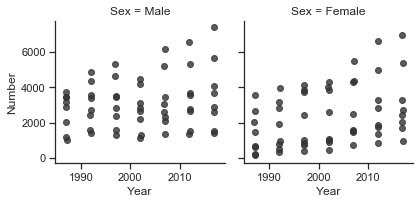

In [15]:
g = sns.FacetGrid(dFF, col="Sex",  margin_titles=True)
g.map(sns.regplot, "Year", "Number", color=".2", fit_reg=False, x_jitter=.1);

## 2) U.S. citizen and permanent resident doctorate recipients, by major field of study, ethnicity, and race: 2017  

In [ ]:
df = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab024_edited_Formatted.xlsx')
df.columns = ['AllFields', 'Field of Study', 'Sub Field', 'Sub Field Number', 'Race/Ethnicity', 'Percent','Number', 'Unnamed1', 'Unnamed2', 'Number2','Unnamed']
dfA = df[['Field of Study', 'Sub Field', 'Race/Ethnicity', 'Number','Percent']] 
dfA.set_index("Field of Study", inplace = True) 
dfA.head()
# Data by Field of Study
LSc   = dfA.loc['Life sciences']
PSES = dfA.loc['Physical sciences and earth sciences']
MCS   = dfA.loc['Mathematics and computer sciences']
PSYC  = dfA.loc['Psychology and social sciences ']
Engr  = dfA.loc['Engineering']
HumAr = dfA.loc['Humanities and arts']
Oth  = dfA.loc['Other']
#dfA.shape

In [ ]:
# Aggregate Race/Ethnicity
dfA_mean = dfA.groupby('Race/Ethnicity', as_index=False)['Percent'].mean()
# Reorder it following the values:
ordered_dfA = dfA_mean.sort_values(by='Percent')
my_range=range(1,len(ordered_dfA.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=ordered_dfA['Percent'], color='olive')
plt.plot(ordered_dfA['Percent'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_dfA['Race/Ethnicity'])
plt.title("2017 U.S. Citizen and Permanent Resident \n Doctrate Recipients by Race/Ethnicity", loc='center')
plt.xlabel('Percent')
plt.ylabel('Race/Ethnicity')


In [ ]:
sns.catplot(y="Race/Ethnicity", x="Percent", height=4, aspect=3,kind="box", data=dfA);
#sns.catplot(x="'Race/Ethnicity'", y="Number", hue="smoker", kind="box", data=dfA_mean);


In [ ]:
chart = sns.catplot(x = "Percent", y="Sub Field",   height=4, aspect=2.5, hue="Race/Ethnicity", kind="swarm", data=Engr).set(title=" 2017 U.S. Citizen and Permanent Resident \n Doctorate Recipients in Engineering");
chart.set_yticklabels(rotation=30)

In [ ]:
## https://python-graph-gallery.com/163-donut-plot-with-subgroups/
 
# Make data: I have 3 groups and 7 subgroups
#Life Science
group_names=['Computer and information sciences', 'Mathematics and statistics ']
group_size=[280,283]
#subgroup_names=['Hsp/L', 'AmInd', 'Asian', 'Black', 'White', '>1Rc', 'Other', 'NoRep', 'Hsp/L', 'AmInd', 'Asian', 'Black', 'White', '>1Rc', 'Other', 'NoRep']
#subgroup_size=[43, 0, 139, 32,515,21,17,29,36,1,137,17,666,29,23,41]
subgroup_names=['Hsp/L','Asian', 'Black',  '>1Rc', 'Other', 'NoRep', 'Hsp/L',  'Asian', 'Black',  '>1Rc', 'Other', 'NoRep']
subgroup_size=[43,139, 32,21,17,29,36, 137,17,29,23,41]

 
# Create colors
a, b, =[plt.cm.Greens, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.9), b(0.9)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.8), a(0.7), a(0.6),a(0.5), a(0.4), a(0.3), b(0.8), b(0.7), b(0.6),b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)
 
figure_title = "2017 Non White U.S. Citizens and Permanent Resident \n Doctrate Recipients in Mathmathics and Computer Science"  
plt.text(0.5, 1.2, figure_title,
         horizontalalignment='center',
         fontsize=12,
         transform = ax.transAxes)
# show it
plt.show()

In [ ]:
modified = dfA.reset_index()

chart =sns.catplot(x="Race/Ethnicity", y="Percent", height=4, aspect=2, hue="Sub Field", kind="swarm", data=modified );
chart.set_xticklabels(rotation=60)
modified.head()

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

In [ ]:
# Categorical scatterplots

tips = sns.load_dataset("tips")
sns.catplot(x="S", y="total_bill", data=tips);

g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".2", fit_reg=False, x_jitter=.1);

In [ ]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); 

In [ ]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

In [ ]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

In [ ]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

In [ ]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

In [ ]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

In [ ]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

# Horizontal boxplot with observations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [ ]:
# Source: https://hub.gke.mybinder.org/user/bokeh-bokeh-notebooks-xygnuogi/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb

# Standard imports 

from bokeh.io import output_notebook, show
output_notebook()

In [ ]:
# Plot a complex chart with intearctive hover in a few lines of code

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [ ]:
from bokeh.plotting import figure, output_file, show
# data sets
x1 = [1, 2, 3, 4, 5]
y1 = [4, 6, 7, 2, 9]
x2 = [1, 2, 3, 4, 5]
y2 = [5, 8, 9, 6, 1]
# output is generated to static HTML file
output_file("lines.html")
# create a new plot with a title and axis labels
p = figure(title="Multiple Plots", x_axis_label='x',y_axis_label='y')
#plot the line graph on the figure and setting up color and width
p.line(x1, y1, legend="Line",color="red", line_width=2)
#plot the circle graph on the figure and setting up color and size
p.circle(x2,y2,legend="Circle",fill_color="yellow",size=15)
# show the results
show(p)

In [ ]:
## https://python-graph-gallery.com/163-donut-plot-with-subgroups/

# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [ ]:
##More complex Sankey diagram with colored links

import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())


In [ ]:
# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()
 

In [ ]:
# Mosaic (marimmeko) plot example https://sukhbinder.wordpress.com/2018/09/18/mosaic-plot-in-python/

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas
 
gender = ['male', 'male', 'male', 'female', 'female', 'female']
pet = ['cat', 'dog', 'dog', 'cat', 'dog', 'cat']
data = pandas.DataFrame({'gender': gender, 'pet': pet})
mosaic(data, ['pet', 'gender'])
plt.show()

In [ ]:
# Error bars --- https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/
    
    # libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()


In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head(20)